<a href="https://colab.research.google.com/github/lihui1625/deepleaning/blob/main/code4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


57026/57026 [==============================] - 0s 0us/step
(404, 13)
(102, 13)


In [2]:
from keras.api._v2.keras import activations
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse",metrics=["mae"])
  return model


In [3]:
import numpy as np

k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores=[]
for i in range(k):
  print("processing fold ", i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs= num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets)
  all_scores.append(val_mae)

print(all_scores)


processing fold  0
4/4 [==============================] - 0s 6ms/step - loss: 6.7055 - mae: 2.0530
processing fold  1
4/4 [==============================] - 0s 4ms/step - loss: 9.9057 - mae: 2.4115
processing fold  2
4/4 [==============================] - 0s 4ms/step - loss: 13.6270 - mae: 2.4769
processing fold  3
4/4 [==============================] - 0s 5ms/step - loss: 12.3819 - mae: 2.5812
[2.0530242919921875, 2.4115395545959473, 2.4769375324249268, 2.5812268257141113]


In [4]:

k = 4
num_val_samples = len(train_data)//k
num_epochs = 500
all_mae_histories=[]
for i in range(k):
  print("processing fold ", i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs= num_epochs, batch_size=16, verbose=0)
  val_mae = history.history["val_mae"]
  all_mae_histories.append(val_mae)

print(all_mae_histories)

processing fold  0
processing fold  1
processing fold  2
processing fold  3
[[18.8078670501709, 15.536079406738281, 11.365727424621582, 7.577634811401367, 5.276623249053955, 4.31434440612793, 3.8414103984832764, 3.5042896270751953, 3.2569828033447266, 3.093379020690918, 2.9167673587799072, 2.7661550045013428, 2.851026773452759, 2.6665737628936768, 2.606112003326416, 2.639535665512085, 2.4700353145599365, 2.3624188899993896, 2.3375864028930664, 2.2794606685638428, 2.330825090408325, 2.19543194770813, 2.1188013553619385, 2.1374287605285645, 2.241752862930298, 2.2788352966308594, 2.037355899810791, 2.064311981201172, 2.0720608234405518, 2.2980172634124756, 2.0057878494262695, 1.9825531244277954, 1.9805965423583984, 1.9024732112884521, 1.9005681276321411, 1.994590401649475, 2.140690803527832, 2.0376033782958984, 1.9043447971343994, 1.9204926490783691, 1.9540574550628662, 1.8972101211547852, 1.9947737455368042, 1.886272668838501, 1.9095453023910522, 1.832015037536621, 2.0203425884246826, 1.

In [7]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print(average_mae_history)

[19.131537914276123, 15.539975643157959, 11.146680355072021, 7.708361029624939, 5.835692048072815, 4.787907004356384, 4.166099011898041, 3.7807458639144897, 3.5134761929512024, 3.3366005420684814, 3.2029672861099243, 3.1339560747146606, 3.028424918651581, 2.935703933238983, 2.894021153450012, 2.8612775206565857, 2.7754372358322144, 2.7244150042533875, 2.718209207057953, 2.725882649421692, 2.7105958461761475, 2.635595202445984, 2.5886707305908203, 2.583907663822174, 2.753006339073181, 2.598385274410248, 2.5660462975502014, 2.5711509585380554, 2.537397027015686, 2.5854418873786926, 2.504372477531433, 2.532637745141983, 2.4725789427757263, 2.499172627925873, 2.51684907078743, 2.4632523357868195, 2.5303685665130615, 2.481475830078125, 2.4527299404144287, 2.4752055406570435, 2.4368056058883667, 2.4165979623794556, 2.4735914170742035, 2.4292901754379272, 2.4647593200206757, 2.4277010560035706, 2.5665261149406433, 2.383758068084717, 2.3922791481018066, 2.4161507189273834, 2.4422731399536133, 

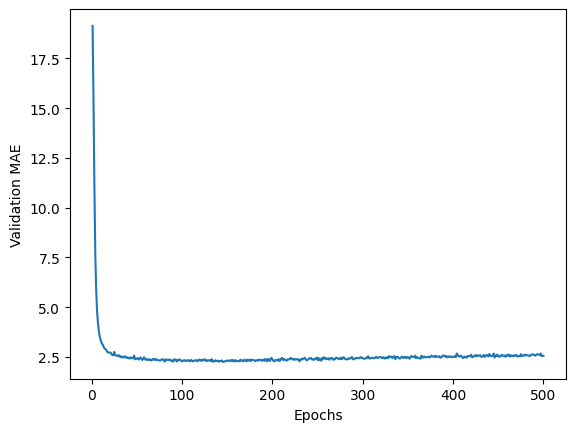

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


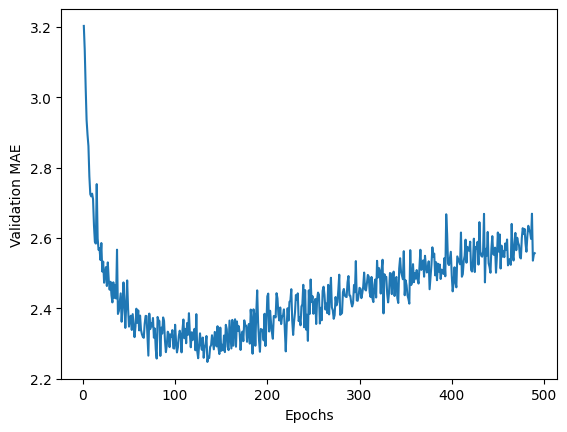

In [10]:
truncated_average_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_average_mae_history)+1), truncated_average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [11]:
model = build_model()
model.fit(train_data, train_targets, epochs= 130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mse_score, test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 16.0187 - mae: 2.5203
16.018657684326172 2.520261526107788


In [12]:
prediction = model.predict(test_data)
print(test_targets)
print(prediction)

4/4 [==============================] - 0s 3ms/step
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]
[[ 7.9814095]
 [18.685198 ]
 [22.130445 ]
 [34.279655 ]
 [25.095007 ]
 [22.975056 ]
 [27.889967 ]
 [22.220442 ]
 [19.921572 ]
 [21.899862 ]
 [20.92467  ]
 [16.921604 ]
 [16.874475 ]
 [43.01053  ]
 [22.867762 ]
 [20.753376 ]
 [25.920004 ]
 [19.482452 ]
 [20.397894 ]
 [27.749308 ]
 [12.926409 ]
 [13.427513 ]
 [21.79141  ]
 [14.8946   ]
 [20.984076 ]
 [25.239511 ]
 [29.301407 ]
 [30.755354 ]
 [12.028796 ]
 [20.459545 ]
 [19.929865